In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Time Series:

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('series_data.csv')

In [4]:
df.isnull().sum()

timestamp    0
visits       0
dtype: int64

<Axes: xlabel='timestamp'>

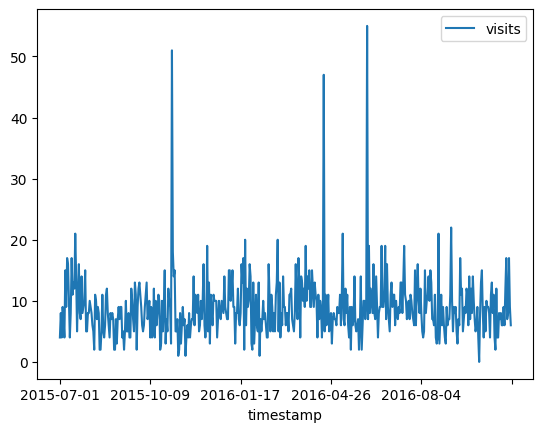

In [14]:
df.plot(x='timestamp', y='visits', kind='line')

In [7]:
# Split the data into train and test sets
train_data = df['visits'].iloc[:-50]
test_data = df['visits'].iloc[-50:]

In [8]:
# Create the ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))

# Fit the model to the training data
model_fit = model.fit()

# Forecast the number of attacks for the next 50 days
predictions = model_fit.forecast(steps=50).astype(int)
# Print the forecasted values
print(predictions)
# Import the mean_squared_error function
# Calculate the mean squared error
mse = mean_squared_error(test_data, predictions)

# Print the mean squared error
print("Mean Squared Error:", mse)



450    9
451    9
452    9
453    9
454    9
455    9
456    9
457    9
458    9
459    9
460    9
461    9
462    9
463    9
464    9
465    9
466    9
467    9
468    9
469    9
470    9
471    9
472    9
473    9
474    9
475    9
476    9
477    9
478    9
479    9
480    9
481    9
482    9
483    9
484    9
485    9
486    9
487    9
488    9
489    9
490    9
491    9
492    9
493    9
494    9
495    9
496    9
497    9
498    9
499    9
Name: predicted_mean, dtype: int32
Mean Squared Error: 13.72


In [18]:
df_with_null = df.copy()
df_with_null['visits'].iloc[10:300] = np.nan


df_with_null.fillna(df.mode(), inplace=True)
# Split the data into train and test sets
train_data = df_with_null['visits'].iloc[:-50]
test_data = df_with_null['visits'].iloc[-50:]
# Create the ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))

# Fit the model to the training data
model_fit = model.fit()

# Forecast the number of attacks for the next 50 days
predictions = model_fit.forecast(steps=50).astype(int)
# Print the forecasted values
print(predictions)
# Import the mean_squared_error function
# Calculate the mean squared error
mse = mean_squared_error(test_data, predictions)

# Print the mean squared error
print("Mean Squared Error:", mse)



C:\Users\Planet_X\AppData\Local\Temp\ipykernel_4232\1267563432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_null['visits'].iloc[10:300] = np.nan


450    9
451    9
452    9
453    9
454    9
455    9
456    9
457    9
458    9
459    9
460    9
461    9
462    9
463    9
464    9
465    9
466    9
467    9
468    9
469    9
470    9
471    9
472    9
473    9
474    9
475    9
476    9
477    9
478    9
479    9
480    9
481    9
482    9
483    9
484    9
485    9
486    9
487    9
488    9
489    9
490    9
491    9
492    9
493    9
494    9
495    9
496    9
497    9
498    9
499    9
Name: predicted_mean, dtype: int32
Mean Squared Error: 13.72
